<a href="https://colab.research.google.com/github/jieunlim/TensorflowTest2022/blob/main/HW4_K-Means%20and%20LinReg%20in%20TF.2.XTFv_2_X.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

1.   Convert the K-Means and Linear Regression algorithms discussed in class from TF 1.X to 2.X manually, by typing the example code modifying it as needed;
2.   Change both models to use real-world data to show how the code works.
*   Data source for K-Means: http://cs.joensuu.fi/sipu/datasets/
*   Data source for Linear Regression: https://www.kaggle.com/aungpyaeap/fish-market



In [1]:
# -*- coding: utf-8 -*-
## k-means algorithm
""" 

Example Using Knee/Elbow plot - in TF v2.X 
==========================================

Intro: 
======
When working with k-means, the data in a training set does not need labels. 
As an unsupervised learning method, the algorithm builds clusters based on 
the data itself. """

import tensorflow as tf
import matplotlib.pyplot as plt
import numpy as np
from scipy.spatial import distance
import pandas as pd

In [2]:
print(tf.__version__)

2.9.2


# **K-Means in TF 2.X**

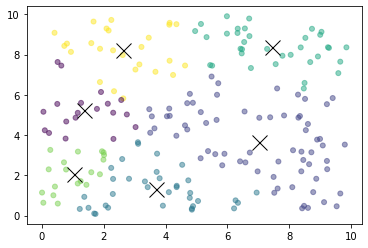

centroids
 tf.Tensor(
[[1.35991297 5.22553994]
 [7.02516508 3.67885569]
 [3.69216769 1.30297944]
 [7.43795595 8.36858769]
 [1.03939054 2.08707955]
 [2.63117602 8.21427864]], shape=(6, 2), dtype=float64)


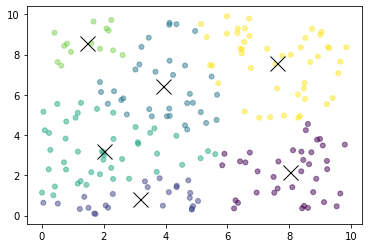

centroids
 tf.Tensor(
[[8.03501043 2.15040063]
 [3.16043748 0.83913722]
 [3.92938609 6.43945049]
 [2.00692923 3.2330071 ]
 [1.46846655 8.58419712]
 [7.59993927 7.59806148]], shape=(6, 2), dtype=float64)


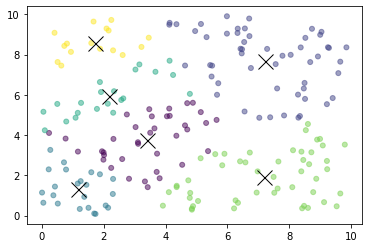

centroids
 tf.Tensor(
[[3.40075531 3.75395872]
 [7.2255049  7.69091107]
 [1.17266615 1.30344662]
 [2.16561364 5.91994121]
 [7.17495711 1.91222118]
 [1.70223726 8.58728022]], shape=(6, 2), dtype=float64)


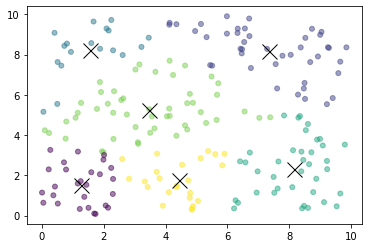

centroids
 tf.Tensor(
[[1.27313749 1.5300877 ]
 [7.34852533 8.16213951]
 [1.54321955 8.22793608]
 [8.15898668 2.33632104]
 [3.4501109  5.24923407]
 [4.43859474 1.75796753]], shape=(6, 2), dtype=float64)


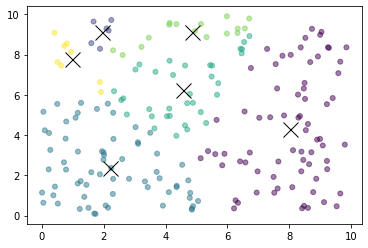

centroids
 tf.Tensor(
[[8.04205763 4.28866871]
 [1.93955245 9.11858738]
 [2.21816903 2.3657802 ]
 [4.56082186 6.2604569 ]
 [4.84663606 9.12054633]
 [0.97425647 7.75666855]], shape=(6, 2), dtype=float64)


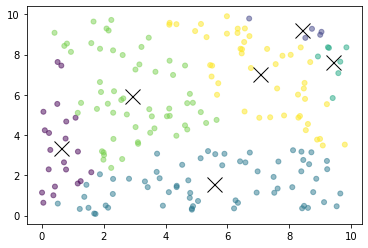

centroids
 tf.Tensor(
[[0.60083431 3.37416861]
 [8.40576692 9.20295051]
 [5.55752565 1.55911782]
 [9.42823424 7.64672398]
 [2.92354184 5.95836741]
 [7.04880533 7.04370644]], shape=(6, 2), dtype=float64)


In [12]:
points_n = 200
clusters_n = 6
k_values = np.arange(clusters_n) + 1
Var_dist = np.zeros(len(k_values))
iteration_n = 100
points = tf.constant(np.random.uniform(0, 10, (points_n, 2)))

for k in k_values:
  cluster_n = k
  centroids=tf.Variable(tf.slice(tf.random.shuffle(points),[0,0],[clusters_n,-1]))
  points_expanded=tf.expand_dims(points,0)
  centroids_expanded=tf.expand_dims(centroids,1)
  distances=tf.reduce_sum(tf.square(tf.subtract(points_expanded,centroids_expanded)),2)
  assignments=tf.argmin(distances,0)
  means=[]

  for c in range(clusters_n):
        means.append(tf.reduce_mean(tf.gather(points,tf.reshape(tf.where(tf.equal(assignments,c)),[1,-1])),axis = 1))


  new_centroids=tf.concat(means,0)
  centroids = new_centroids
  update_centroids = centroids    
    
  for step in range(iteration_n):
      [_, centroid_values, points_values, assignment_values]=[update_centroids,centroids, points,assignments]
  

  plt.scatter(points_values[:,0], points_values[:,1], c=assignment_values, s=25, alpha=0.5)
  plt.plot(centroid_values[:,0], centroid_values[:,1],'kx', markersize=15)
  plt.pause(1)


  print("centroids" + "\n", centroid_values)
  

  from scipy.spatial import distance
  dist=np.zeros(points_n)
  j=0;
  while j<k:
      for i in range(200):
          if assignment_values[i]==j:
              dist[i]=distance.euclidean(points_values[i,:],centroid_values[j])         
      j=j+1
  Var_dist[k-1]=sum(dist)



[ 23.29791313  93.99590753 190.93735136 192.86396432 404.11005627
 432.04328845]


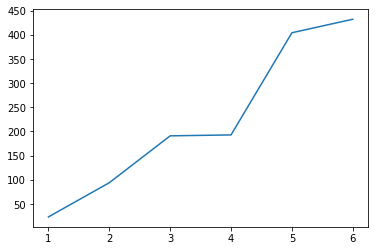

In [13]:
print(Var_dist)
plt.plot(k_values, Var_dist)
plt.show()

# **Apply K-Means to the S-sets data** S1, S2, S3 , S4

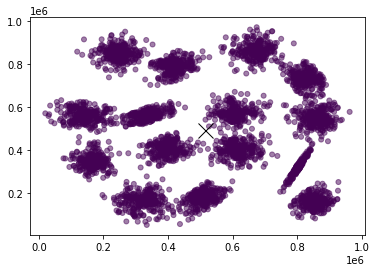

centroids
 tf.Tensor([[514937.  494709.8]], shape=(1, 2), dtype=float32)


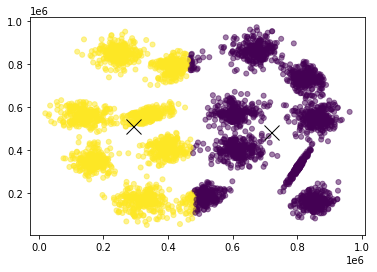

centroids
 tf.Tensor(
[[718961.   481238.72]
 [289799.2  509574.2 ]], shape=(2, 2), dtype=float32)


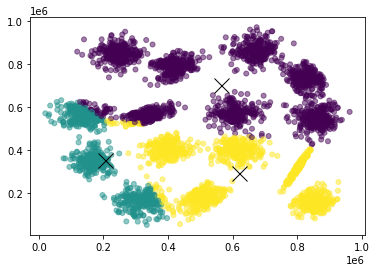

centroids
 tf.Tensor(
[[562691.4  701991.94]
 [204884.17 351066.03]
 [619735.6  292335.  ]], shape=(3, 2), dtype=float32)


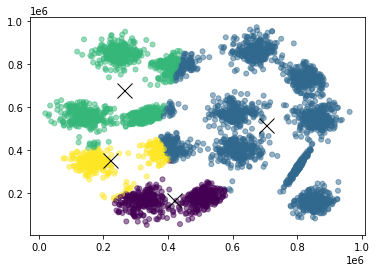

centroids
 tf.Tensor(
[[418081.75 167897.3 ]
 [704225.8  516591.16]
 [264340.9  679020.25]
 [219628.31 351720.28]], shape=(4, 2), dtype=float32)


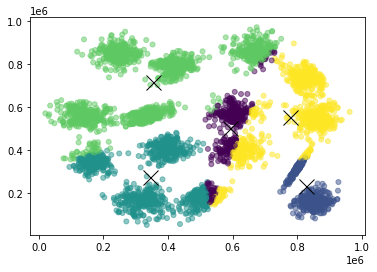

centroids
 tf.Tensor(
[[592238.5  502909.38]
 [827915.3  230680.72]
 [345438.8  273592.7 ]
 [354707.94 715151.3 ]
 [776682.44 554032.56]], shape=(5, 2), dtype=float32)


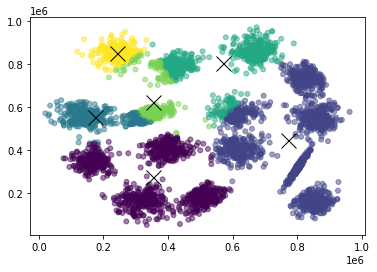

centroids
 tf.Tensor(
[[352178.03 272012.38]
 [772153.3  446963.38]
 [172967.22 553870.5 ]
 [568639.2  803056.2 ]
 [352448.75 621214.25]
 [240987.7  850701.94]], shape=(6, 2), dtype=float32)


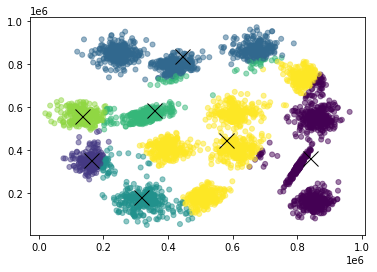

centroids
 tf.Tensor(
[[837957.5  361316.62]
 [161901.83 351192.9 ]
 [442200.22 837275.75]
 [314594.88 179259.42]
 [356799.2  585281.  ]
 [134923.14 559242.  ]
 [579628.8  445953.5 ]], shape=(7, 2), dtype=float32)


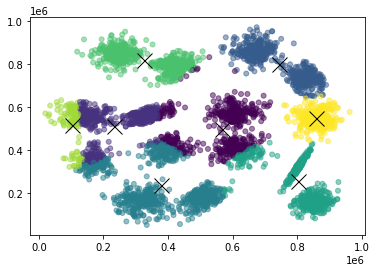

centroids
 tf.Tensor(
[[566993.4  497004.22]
 [232930.84 510693.4 ]
 [743315.06 800708.75]
 [378126.78 238804.75]
 [802745.3  253498.52]
 [325788.   819138.6 ]
 [103189.69 514957.06]
 [858889.7  546818.2 ]], shape=(8, 2), dtype=float32)


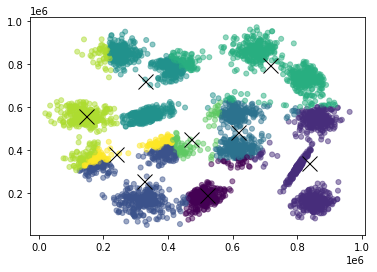

centroids
 tf.Tensor(
[[519900.6  191595.55]
 [836651.75 339265.9 ]
 [326503.1  253788.88]
 [617519.2  483740.72]
 [328512.62 718810.4 ]
 [714003.   792812.75]
 [470434.84 450598.56]
 [145678.03 558282.5 ]
 [238035.17 379003.4 ]], shape=(9, 2), dtype=float32)


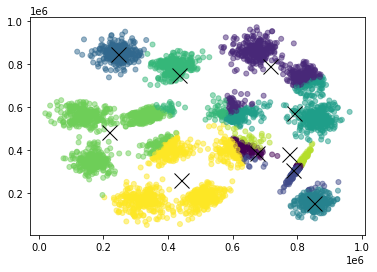

centroids
 tf.Tensor(
[[674071.94 385785.44]
 [716361.5  790279.9 ]
 [786016.6  305896.38]
 [244069.27 847517.8 ]
 [852410.56 155366.1 ]
 [791148.5  570308.8 ]
 [434385.56 747441.8 ]
 [218166.8  482807.2 ]
 [774036.9  381726.88]
 [438682.1  258679.8 ]], shape=(10, 2), dtype=float32)


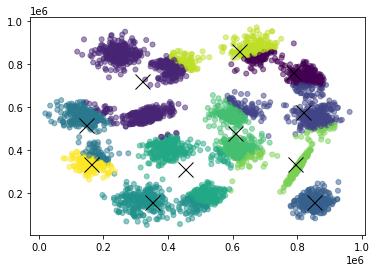

centroids
 tf.Tensor(
[[786239.75 763063.44]
 [318317.4  720804.75]
 [816628.94 574641.6 ]
 [852676.1  157386.94]
 [144763.28 518138.1 ]
 [351137.9  157425.98]
 [453630.4  310349.88]
 [607300.5  476995.84]
 [792656.7  336165.88]
 [620246.   861804.1 ]
 [162404.89 336812.22]], shape=(11, 2), dtype=float32)


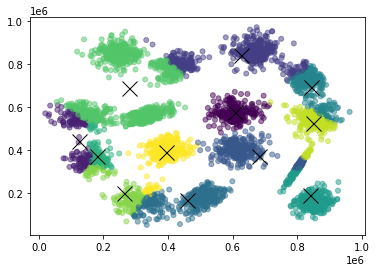

centroids
 tf.Tensor(
[[605880.44 574235.44]
 [123825.08 442098.84]
 [624373.56 841242.56]
 [682128.25 374014.88]
 [458413.66 166780.34]
 [841052.25 693442.9 ]
 [837664.7  191488.98]
 [179544.58 370268.25]
 [279011.8  688613.7 ]
 [264826.72 198493.31]
 [849120.6  523605.34]
 [393248.22 389091.53]], shape=(12, 2), dtype=float32)


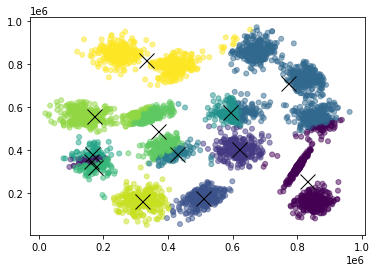

centroids
 tf.Tensor(
[[830682.9  255729.64]
 [161736.33 350775.1 ]
 [618406.   402269.22]
 [506461.22 174670.77]
 [771368.   712103.25]
 [426686.6  381932.03]
 [590502.56 574228.  ]
 [163252.6  383336.56]
 [175040.55 321219.62]
 [369092.4  486425.03]
 [169139.11 558890.06]
 [319953.44 162642.61]
 [332057.75 819939.94]], shape=(13, 2), dtype=float32)


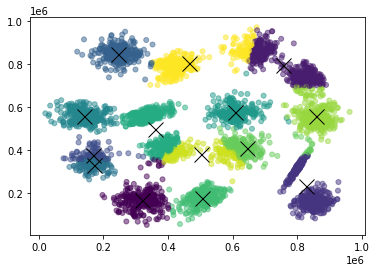

centroids
 tf.Tensor(
[[320414.38 166990.89]
 [755353.5  796992.06]
 [827825.9  233078.33]
 [168882.64 375104.97]
 [246087.89 846727.3 ]
 [169319.48 331356.1 ]
 [140019.75 558305.56]
 [607957.4  575336.44]
 [360232.97 498849.5 ]
 [506219.9  174821.56]
 [645009.06 406888.12]
 [857869.5  558402.4 ]
 [501819.94 382003.12]
 [464901.53 805334.5 ]], shape=(14, 2), dtype=float32)


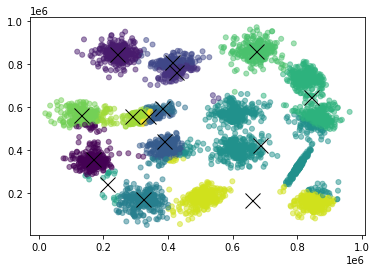

centroids
 tf.Tensor(
[[167188.25 358613.1 ]
 [242937.08 847402.75]
 [423059.1  763758.06]
 [411105.16 810074.6 ]
 [387067.62 442389.22]
 [379679.9  592890.06]
 [323011.25 170283.38]
 [684210.75 425192.6 ]
 [209888.06 241715.28]
 [843327.4  645086.1 ]
 [671921.75 861197.7 ]
 [130530.02 561556.5 ]
 [288720.4  557967.5 ]
 [660083.75 167646.33]
 [336317.97 556926.06]], shape=(15, 2), dtype=float32)


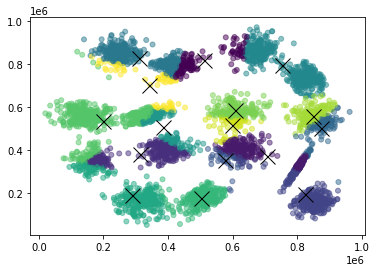

centroids
 tf.Tensor(
[[510353.66 816175.5 ]
 [706669.5  370484.88]
 [311676.6  379122.6 ]
 [824548.   196003.11]
 [576487.9  353689.8 ]
 [873394.25 500745.34]
 [310122.8  828296.7 ]
 [751877.   796618.4 ]
 [384479.56 506492.22]
 [286916.9  190453.67]
 [502173.53 174726.44]
 [197010.45 536094.  ]
 [607974.4  583436.44]
 [849534.9  559821.8 ]
 [596568.44 514795.5 ]
 [340636.6  701565.4 ]], shape=(16, 2), dtype=float32)


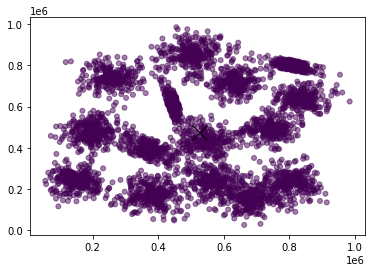

centroids
 tf.Tensor([[525659.3 477365.3]], shape=(1, 2), dtype=float32)


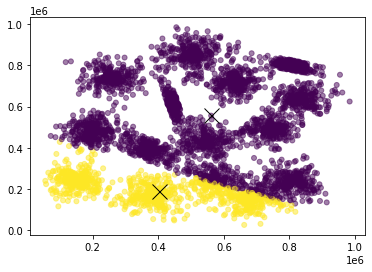

centroids
 tf.Tensor(
[[560425.9  557855.56]
 [401094.47 188973.9 ]], shape=(2, 2), dtype=float32)


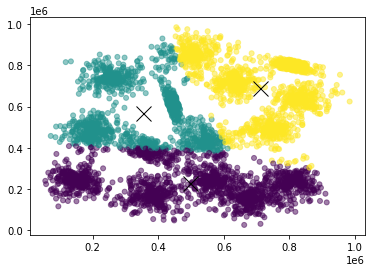

centroids
 tf.Tensor(
[[495340.03 227546.66]
 [352961.84 566956.5 ]
 [708843.7  689339.5 ]], shape=(3, 2), dtype=float32)


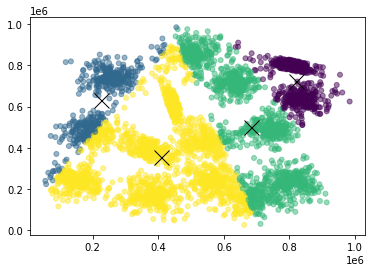

centroids
 tf.Tensor(
[[820546.8  723294.  ]
 [225025.2  630257.75]
 [683389.3  500240.38]
 [407583.6  353372.44]], shape=(4, 2), dtype=float32)


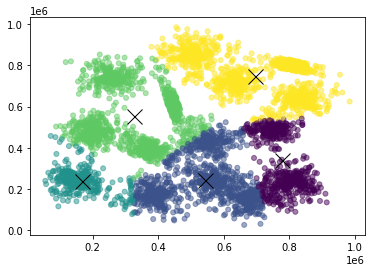

centroids
 tf.Tensor(
[[775949.56 340528.94]
 [542734.1  243346.3 ]
 [167468.55 236580.73]
 [325567.12 552888.3 ]
 [693827.7  750402.6 ]], shape=(5, 2), dtype=float32)


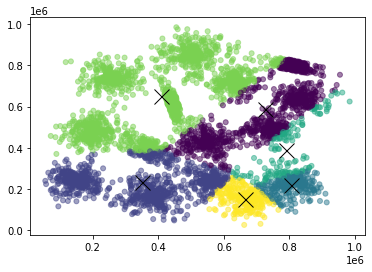

centroids
 tf.Tensor(
[[725628.3  587120.94]
 [349405.03 232222.  ]
 [805954.9  217399.58]
 [790888.1  391260.88]
 [407430.16 650110.4 ]
 [664189.44 152899.78]], shape=(6, 2), dtype=float32)


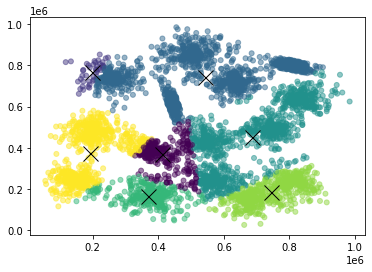

centroids
 tf.Tensor(
[[410391.   369132.44]
 [196709.1  767735.44]
 [542839.06 744461.94]
 [687183.44 452382.75]
 [369484.25 165556.58]
 [744382.94 186825.03]
 [192207.3  373086.9 ]], shape=(7, 2), dtype=float32)


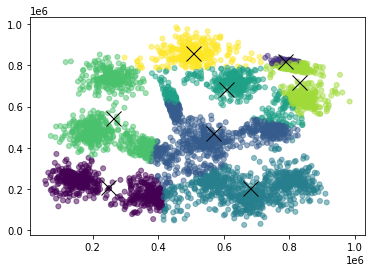

centroids
 tf.Tensor(
[[245478.38 209165.03]
 [787189.4  821199.1 ]
 [565764.2  470961.5 ]
 [678332.3  202516.48]
 [608035.4  684539.3 ]
 [262401.5  542689.5 ]
 [828793.4  718496.06]
 [505940.1  857491.6 ]], shape=(8, 2), dtype=float32)


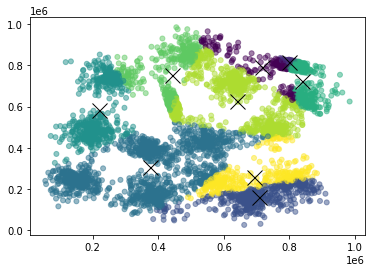

centroids
 tf.Tensor(
[[715364.56 791342.4 ]
 [798526.5  818191.  ]
 [707719.5  161119.64]
 [374302.7  305779.97]
 [218464.5  585338.9 ]
 [838104.3  722987.9 ]
 [441268.38 753647.3 ]
 [640651.7  625815.9 ]
 [690494.9  258291.38]], shape=(9, 2), dtype=float32)


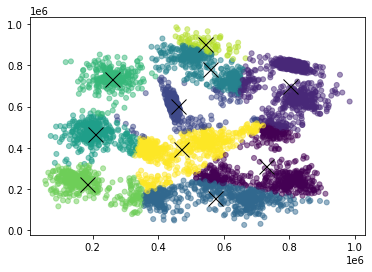

centroids
 tf.Tensor(
[[727494.06 310085.6 ]
 [801703.8  698826.2 ]
 [460456.6  602844.06]
 [572632.8  158498.17]
 [556603.6  782359.7 ]
 [208005.25 466795.47]
 [258031.75 735404.75]
 [183427.27 223294.48]
 [543818.94 905001.44]
 [468197.03 393119.5 ]], shape=(10, 2), dtype=float32)


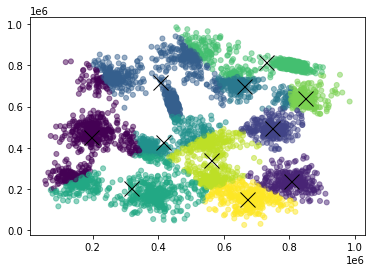

centroids
 tf.Tensor(
[[195447.61 453364.62]
 [805661.56 238062.2 ]
 [747788.94 493357.38]
 [405842.2  719797.9 ]
 [660259.   697335.  ]
 [413178.44 426845.3 ]
 [315416.62 203401.78]
 [729067.2  814034.6 ]
 [847621.6  640533.9 ]
 [560705.56 340573.38]
 [671496.56 152889.66]], shape=(11, 2), dtype=float32)


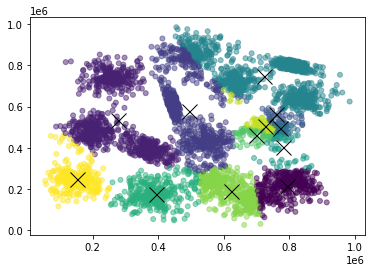

centroids
 tf.Tensor(
[[793540.6  216173.55]
 [277655.06 532607.7 ]
 [492881.88 577651.4 ]
 [759878.44 561327.94]
 [772152.44 495504.38]
 [722767.   749242.9 ]
 [779041.06 405978.53]
 [392773.53 177469.62]
 [698596.7  462249.28]
 [621045.1  191632.47]
 [725472.06 506588.56]
 [151405.98 247473.78]], shape=(12, 2), dtype=float32)


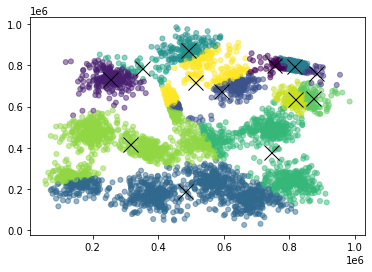

centroids
 tf.Tensor(
[[752385.8  801384.9 ]
 [253550.97 732705.7 ]
 [880148.   762962.7 ]
 [590143.2  673544.8 ]
 [480546.2  190593.92]
 [814591.9  798675.6 ]
 [491525.03 873041.44]
 [349728.7  786370.4 ]
 [743885.25 379806.12]
 [873250.1  639024.44]
 [313855.9  417838.34]
 [817332.8  636989.9 ]
 [510554.06 718073.5 ]], shape=(13, 2), dtype=float32)


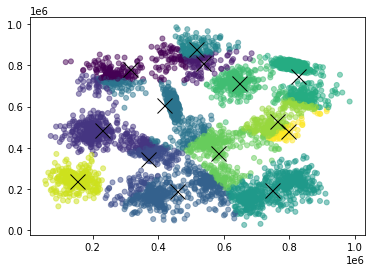

centroids
 tf.Tensor(
[[314994.2  783881.4 ]
 [536068.56 812271.75]
 [229360.58 484923.16]
 [369412.6  343991.16]
 [458426.25 187839.39]
 [418484.94 605056.  ]
 [516042.7  880881.  ]
 [746271.3  193960.05]
 [824821.44 746351.7 ]
 [645311.2  711714.2 ]
 [582505.56 374391.84]
 [761984.1  529623.94]
 [151037.14 240678.42]
 [794275.25 482190.88]], shape=(14, 2), dtype=float32)


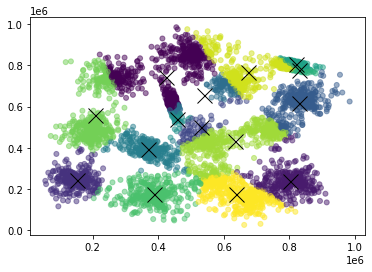

centroids
 tf.Tensor(
[[424117.72 743480.94]
 [800412.3  240702.78]
 [150771.38 243305.4 ]
 [531305.94 502443.94]
 [827671.2  618196.94]
 [539971.3  655401.56]
 [369679.53 391847.03]
 [457819.5  537069.75]
 [820533.7  805265.9 ]
 [829846.06 778575.1 ]
 [387874.12 174254.19]
 [207302.25 558276.56]
 [634052.1  431531.3 ]
 [674784.   768074.7 ]
 [638244.25 177009.47]], shape=(15, 2), dtype=float32)


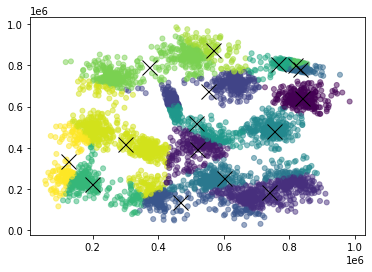

centroids
 tf.Tensor(
[[837084.75 639175.  ]
 [518190.9  395583.66]
 [738685.3  186967.61]
 [552920.75 676679.6 ]
 [467738.47 135464.52]
 [831287.25 782305.  ]
 [599513.75 251768.62]
 [752265.3  480326.97]
 [514491.97 519382.7 ]
 [765098.56 804026.06]
 [198307.08 222216.56]
 [816567.   803691.25]
 [372546.5  792342.56]
 [566407.06 874489.7 ]
 [300123.4  418654.3 ]
 [124883.14 333427.94]], shape=(16, 2), dtype=float32)


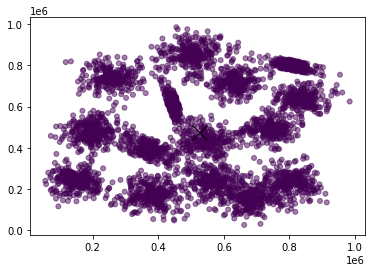

centroids
 tf.Tensor([[525659.3 477365.3]], shape=(1, 2), dtype=float32)


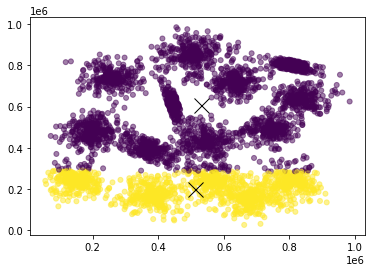

centroids
 tf.Tensor(
[[531680.7  606584.25]
 [512783.28 201001.02]], shape=(2, 2), dtype=float32)


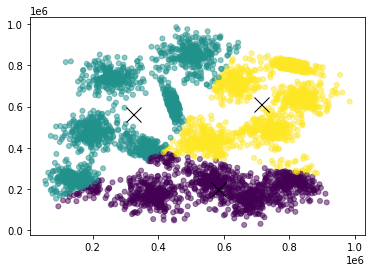

centroids
 tf.Tensor(
[[580976.6  200700.72]
 [322720.44 564630.9 ]
 [714379.56 610164.06]], shape=(3, 2), dtype=float32)


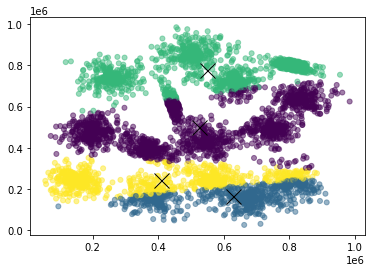

centroids
 tf.Tensor(
[[522938.28 502436.  ]
 [627222.4  163651.92]
 [549123.94 775606.8 ]
 [409192.53 243246.45]], shape=(4, 2), dtype=float32)


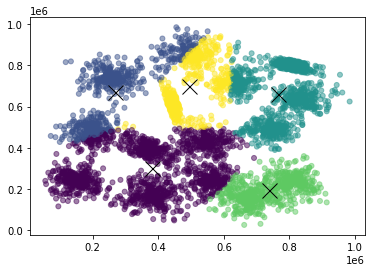

centroids
 tf.Tensor(
[[382346.1  299963.9 ]
 [269032.53 669609.4 ]
 [764648.7  658579.1 ]
 [736610.75 193101.08]
 [494290.62 697655.2 ]], shape=(5, 2), dtype=float32)


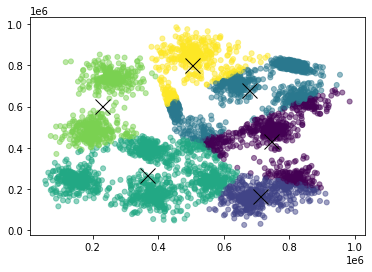

centroids
 tf.Tensor(
[[744305.   430967.8 ]
 [710026.7  166238.58]
 [675737.06 681216.1 ]
 [367031.25 268803.22]
 [229115.48 602262.94]
 [503007.62 800078.5 ]], shape=(6, 2), dtype=float32)


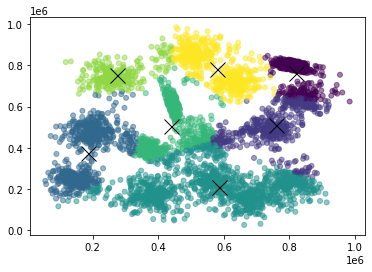

centroids
 tf.Tensor(
[[820406.75 762839.6 ]
 [759139.1  510779.88]
 [184672.6  375837.44]
 [584578.75 209900.38]
 [439392.   504157.53]
 [274545.66 753214.3 ]
 [580339.56 782865.44]], shape=(7, 2), dtype=float32)


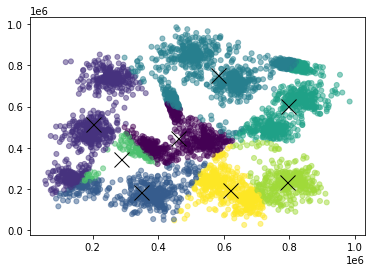

centroids
 tf.Tensor(
[[459466.72 445248.2 ]
 [202146.25 513547.03]
 [348037.3  187132.25]
 [581702.44 753558.  ]
 [796944.4  603812.75]
 [286803.62 346662.22]
 [792840.8  234354.38]
 [617875.   195310.31]], shape=(8, 2), dtype=float32)


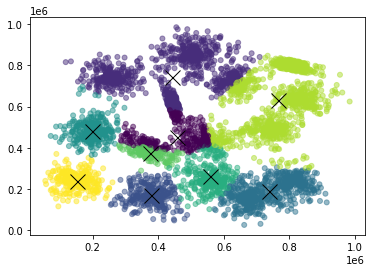

centroids
 tf.Tensor(
[[457827.2  450622.2 ]
 [440651.97 743692.25]
 [378780.75 168977.9 ]
 [738328.06 189277.77]
 [198294.88 482926.56]
 [557903.06 262885.94]
 [373975.25 376319.97]
 [764169.8  633293.8 ]
 [152590.86 239488.38]], shape=(9, 2), dtype=float32)


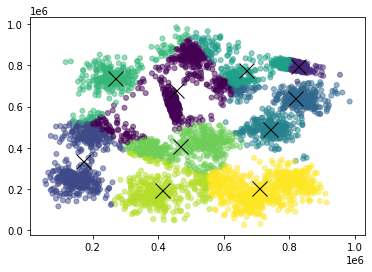

centroids
 tf.Tensor(
[[454924.9  680014.9 ]
 [824980.1  794143.2 ]
 [169824.69 336032.78]
 [816854.75 642379.5 ]
 [741406.56 492879.38]
 [668185.7  776221.75]
 [267298.9  739776.4 ]
 [466361.4  407120.4 ]
 [410375.97 192869.9 ]
 [705829.94 202678.11]], shape=(10, 2), dtype=float32)


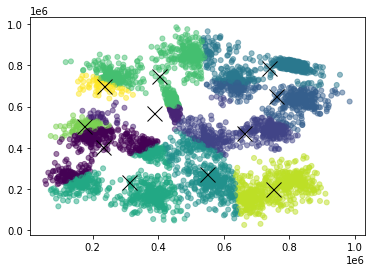

centroids
 tf.Tensor(
[[231630.2  403077.34]
 [388329.   570540.1 ]
 [660461.   473140.28]
 [759015.   650416.6 ]
 [737420.06 788847.9 ]
 [549721.   270415.  ]
 [310011.22 234027.53]
 [402982.94 748561.44]
 [174923.52 503349.8 ]
 [749628.94 197458.34]
 [235082.77 698012.06]], shape=(11, 2), dtype=float32)


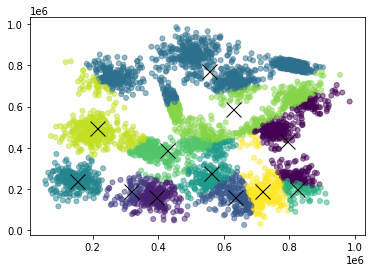

centroids
 tf.Tensor(
[[793279.25 434958.53]
 [393038.84 160671.56]
 [316240.25 188762.48]
 [634521.9  161125.52]
 [554438.25 772301.56]
 [150902.38 240311.5 ]
 [560600.44 276704.94]
 [823823.   202033.2 ]
 [426307.66 391062.38]
 [629290.4  588596.5 ]
 [212377.62 496727.6 ]
 [716247.75 191257.55]], shape=(12, 2), dtype=float32)


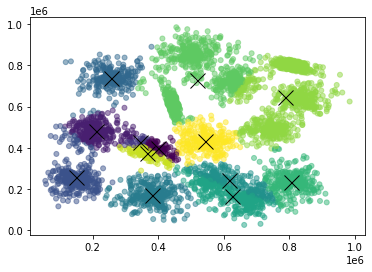

centroids
 tf.Tensor(
[[397842.53 399229.88]
 [211482.2  480999.53]
 [344503.44 428637.22]
 [150536.28 258044.1 ]
 [255502.52 738293.94]
 [380646.16 169720.56]
 [616449.7  241618.23]
 [625036.8  168012.06]
 [805795.1  233747.78]
 [517487.88 731043.  ]
 [786386.1  645989.2 ]
 [365888.1  376547.38]
 [544052.   432505.9 ]], shape=(13, 2), dtype=float32)


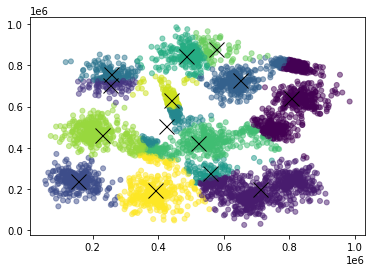

centroids
 tf.Tensor(
[[803431.8  642428.44]
 [708914.44 198346.22]
 [253613.42 704166.9 ]
 [154570.53 238041.73]
 [650554.2  727794.6 ]
 [255440.97 758784.9 ]
 [424068.78 505778.62]
 [557845.   277842.56]
 [485844.97 847436.9 ]
 [520307.06 421831.1 ]
 [576947.8  878867.6 ]
 [228576.88 463784.47]
 [439913.   629502.44]
 [391190.56 194648.6 ]], shape=(14, 2), dtype=float32)


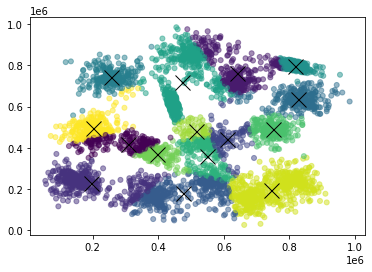

centroids
 tf.Tensor(
[[308422.66 416834.9 ]
 [639726.5  762206.75]
 [194825.47 229708.05]
 [610897.75 442157.  ]
 [474961.06 182836.33]
 [826370.6  635816.25]
 [254800.94 742787.5 ]
 [817413.   796634.5 ]
 [472122.22 717110.1 ]
 [547228.25 361755.28]
 [749067.94 488545.25]
 [395119.4  369099.8 ]
 [514552.4  482831.28]
 [744649.6  195334.78]
 [200943.39 497428.06]], shape=(15, 2), dtype=float32)


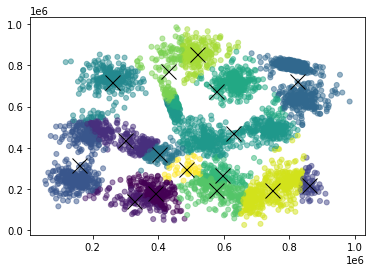

centroids
 tf.Tensor(
[[390823.7  181255.34]
 [324908.88 141575.64]
 [298479.66 439165.  ]
 [859682.75 220048.11]
 [157911.64 315473.3 ]
 [823162.8  722654.  ]
 [401743.8  371938.34]
 [258370.17 718501.6 ]
 [626785.8  472497.62]
 [575034.9  675656.3 ]
 [595023.3  269967.9 ]
 [576599.   196524.14]
 [429504.28 770279.4 ]
 [519177.22 852933.8 ]
 [745728.56 196216.39]
 [484414.66 296866.28]], shape=(16, 2), dtype=float32)


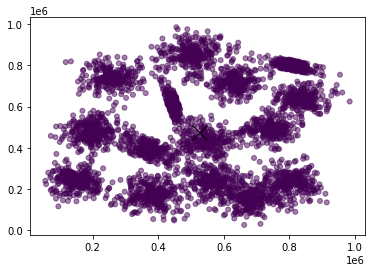

centroids
 tf.Tensor([[525659.3 477365.3]], shape=(1, 2), dtype=float32)


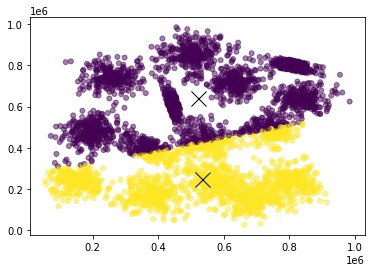

centroids
 tf.Tensor(
[[519779.5 642610.6]
 [533726.4 250663.2]], shape=(2, 2), dtype=float32)


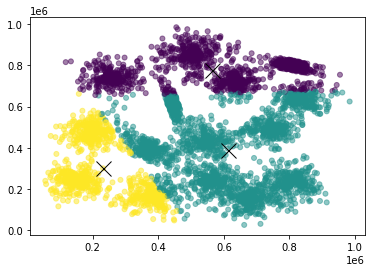

centroids
 tf.Tensor(
[[563282.9  775957.6 ]
 [614114.25 386735.3 ]
 [231057.02 301940.38]], shape=(3, 2), dtype=float32)


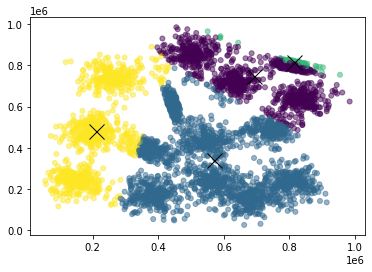

centroids
 tf.Tensor(
[[691886.25 745674.7 ]
 [569649.   338261.9 ]
 [813361.   817743.8 ]
 [211692.06 479047.3 ]], shape=(4, 2), dtype=float32)


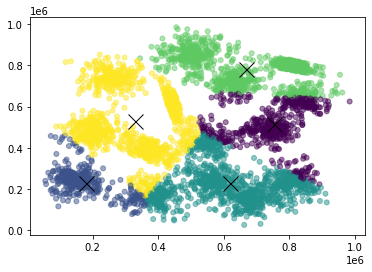

centroids
 tf.Tensor(
[[754080.94 514865.03]
 [179158.92 231191.5 ]
 [617562.44 226772.4 ]
 [668563.75 779936.8 ]
 [328814.25 532033.8 ]], shape=(5, 2), dtype=float32)


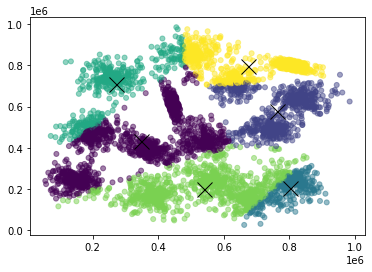

centroids
 tf.Tensor(
[[346191.97 431110.72]
 [760994.25 578703.25]
 [802134.2  206483.48]
 [269792.22 706845.9 ]
 [539389.3  201036.55]
 [673376.56 798579.3 ]], shape=(6, 2), dtype=float32)


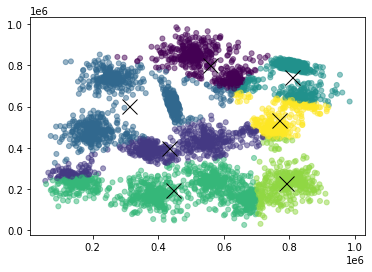

centroids
 tf.Tensor(
[[556799.9  803658.3 ]
 [431919.44 398610.06]
 [310190.22 603138.9 ]
 [807052.7  742543.06]
 [446397.06 197431.8 ]
 [790819.2  228252.83]
 [769434.94 533975.3 ]], shape=(7, 2), dtype=float32)


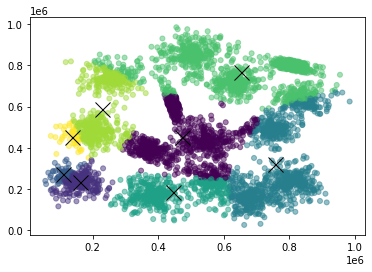

centroids
 tf.Tensor(
[[471957.47 451495.34]
 [161727.61 231554.44]
 [108183.24 274300.28]
 [755926.2  319298.7 ]
 [446302.44 183881.  ]
 [652854.6  766771.44]
 [229127.28 589833.7 ]
 [135711.69 450652.5 ]], shape=(8, 2), dtype=float32)


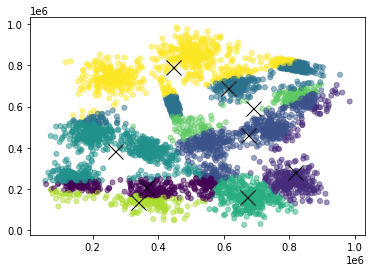

centroids
 tf.Tensor(
[[364182.62 209110.02]
 [816041.5  282618.4 ]
 [673765.44 462753.56]
 [612552.25 692044.2 ]
 [267827.84 385158.97]
 [670159.3  160141.23]
 [689129.75 593939.44]
 [337347.16 137688.7 ]
 [443555.6  791029.25]], shape=(9, 2), dtype=float32)


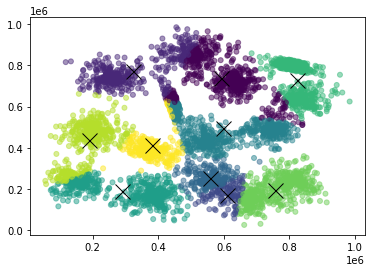

centroids
 tf.Tensor(
[[591167.44 739272.5 ]
 [322308.25 774132.5 ]
 [611113.94 169829.06]
 [557476.1  254900.86]
 [597308.4  494223.8 ]
 [290141.22 191288.56]
 [824029.   726657.25]
 [755156.56 196401.83]
 [187357.67 435700.03]
 [380609.66 411709.5 ]], shape=(10, 2), dtype=float32)


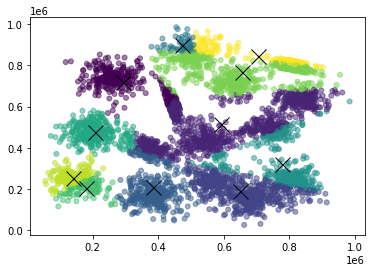

centroids
 tf.Tensor(
[[291967.75 720041.3 ]
 [592030.6  515122.53]
 [649288.3  190180.9 ]
 [383067.9  207392.66]
 [472489.28 896522.44]
 [777756.1  320445.47]
 [207207.53 474004.7 ]
 [180681.7  203465.25]
 [654740.3  766351.6 ]
 [141290.97 255095.66]
 [704042.4  846130.3 ]], shape=(11, 2), dtype=float32)


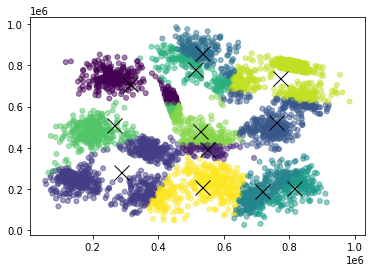

centroids
 tf.Tensor(
[[312915.1  709566.75]
 [549386.1  392490.22]
 [285274.12 281311.12]
 [759706.5  526060.1 ]
 [534433.56 859947.9 ]
 [716363.9  189193.44]
 [814974.25 205733.31]
 [511686.5  780936.6 ]
 [264809.28 509216.47]
 [528143.1  481001.4 ]
 [769749.6  740150.25]
 [532291.7  210901.36]], shape=(12, 2), dtype=float32)


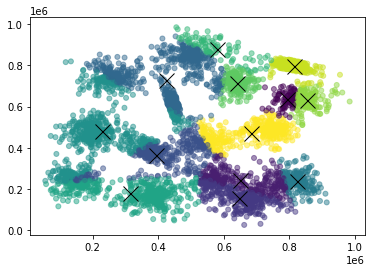

centroids
 tf.Tensor(
[[791752.8  634730.25]
 [650526.6  245320.11]
 [646448.94 158612.47]
 [392563.03 363811.3 ]
 [425028.47 729107.25]
 [823601.56 238500.02]
 [228955.83 483133.9 ]
 [313880.56 182880.19]
 [580144.44 879219.2 ]
 [640496.75 713319.25]
 [852448.1  629956.8 ]
 [813099.1  794774.75]
 [681526.5  471805.03]], shape=(13, 2), dtype=float32)


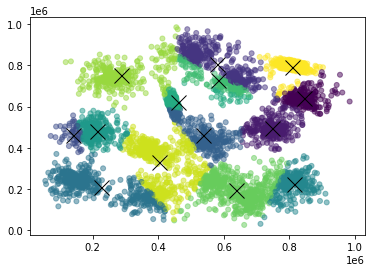

centroids
 tf.Tensor(
[[844343.4  640343.2 ]
 [747669.3  496078.1 ]
 [579759.7  805008.06]
 [138873.17 463744.03]
 [537291.8  460465.88]
 [224055.62 210664.55]
 [813797.8  223916.92]
 [212345.16 480263.12]
 [461506.16 621673.94]
 [582320.7  726430.4 ]
 [638012.8  194111.42]
 [287124.62 751323.7 ]
 [403774.8  329067.16]
 [808441.8  793646.8 ]], shape=(14, 2), dtype=float32)


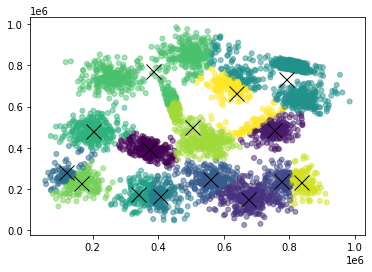

centroids
 tf.Tensor(
[[370294.38 392077.88]
 [752553.25 485662.9 ]
 [673877.8  152367.19]
 [775288.6  238087.95]
 [557797.44 247711.3 ]
 [119110.48 280592.28]
 [406751.28 164609.62]
 [788984.25 735034.44]
 [339488.88 176357.3 ]
 [202315.89 481375.5 ]
 [384317.94 771513.7 ]
 [164644.02 229823.36]
 [503685.75 498522.3 ]
 [834117.5  233996.6 ]
 [637960.5  663450.7 ]], shape=(15, 2), dtype=float32)


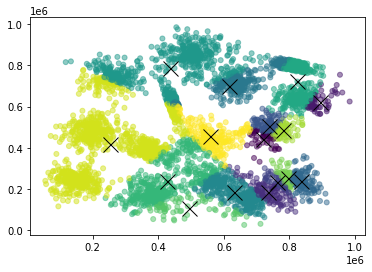

centroids
 tf.Tensor(
[[718277.7   440625.38 ]
 [893935.    621762.7  ]
 [733920.94  183927.61 ]
 [761992.06  233660.06 ]
 [737852.94  504050.22 ]
 [836211.4   236297.92 ]
 [616073.75  700881.44 ]
 [629847.6   184857.56 ]
 [435677.8   788024.6  ]
 [821829.3   722078.   ]
 [425291.3   238126.19 ]
 [492633.75  106718.336]
 [794364.94  252996.22 ]
 [780200.25  485488.72 ]
 [253790.64  420175.53 ]
 [557477.1   455179.94 ]], shape=(16, 2), dtype=float32)


In [17]:
# define a K-Means clustering function for easier implementation
def Kmeans(array, points_n, iteration_n, clusters_n):
  

  points = tf.constant(array)
  k_values = np.arange(clusters_n) + 1
  Var_dist = np.zeros(len(k_values))


  for k in k_values:
      clusters_n = k 
      centroids=tf.Variable(tf.slice(tf.random.shuffle(points),[0,0],[clusters_n,-1]))
      points_expanded=tf.expand_dims(points,0)
      centroids_expanded=tf.expand_dims(centroids,1)
      
      distances=tf.reduce_sum(tf.square(tf.subtract(points_expanded,centroids_expanded)),2)
      assignments=tf.argmin(distances,0)
      
      means=[]

      for c in range(clusters_n):
          means.append(tf.reduce_mean(tf.gather(points,tf.reshape(tf.where(tf.equal(assignments,c)),[1,-1])),axis = 1))

      new_centroids=tf.concat(means,0)
      centroids = new_centroids
      update_centroids = centroids    
      
      for step in range(iteration_n):
          [_, centroid_values, points_values, assignment_values]=[update_centroids,centroids, points,assignments]
      
    
      plt.scatter(points_values[:,0], points_values[:,1], c=assignment_values, s=25, alpha=0.5)
      plt.plot(centroid_values[:,0], centroid_values[:,1],'kx', markersize=15)
      plt.pause(1)


      print("centroids" + "\n", centroid_values)
      
  
      from scipy.spatial import distance
      dist=np.zeros(points_n)
      j=0;
      while j<k:
          for i in range(200):
              if assignment_values[i]==j:
                  dist[i]=distance.euclidean(points_values[i,:],centroid_values[j])         
          j=j+1
      Var_dist[k-1]=sum(dist)


# ... your code here
s1 = open('s1.txt', 'r')
s1_array = []
for row in s1.readlines():
    s1_array.append([float(row.split()[0]), float(row.split()[1])])

s2 = open('s2.txt', 'r')
s2_array = []
for row in s2.readlines():
    s2_array.append([float(row.split()[0]), float(row.split()[1])])

s3 = open('s2.txt', 'r')
s3_array = []
for row in s3.readlines():
    s3_array.append([float(row.split()[0]), float(row.split()[1])])

s4 = open('s2.txt', 'r')
s4_array = []
for row in s4.readlines():
    s4_array.append([float(row.split()[0]), float(row.split()[1])])


points_n = 5000
iteration_n = 1000
clusters_n = 16

Kmeans(s1_array, points_n, iteration_n, clusters_n)
Kmeans(s2_array, points_n, iteration_n, clusters_n)
Kmeans(s3_array, points_n, iteration_n, clusters_n)
Kmeans(s4_array, points_n, iteration_n, clusters_n)

# **Linear Regression in TF 2.X** on Blood Fat dataset

In [18]:
# Computing our model in a series of mathematical operations that we apply 
# to our data: 
def inference(X):
    return tf.matmul(X, W) + b
# ... your code here

W = tf.Variable(tf.ones(shape=(2,1)), name="Weights")
b = tf.Variable(0., name="Bias")



# Calculate loss over expected output

def loss(X, Y):
  Y_predicted = inference(X)
  return tf.reduce_sum(tf.math.squared_difference(Y, Y_predicted))
    
# Read input training data
def inputs():
    weight_age = []
    blood_fat  = []
    data = pd.read_csv('blood_fat_data.csv')
    data.head(1)                # reads the first line
    rows = len(data)            # counts the number of rows in the file
    shape = data.shape          # shows the shape
    columns = (data.columns)    # shows the column titles
    weight = data[columns[0]]   # write entire column
    age = data[columns[1]]      # write entire column
    blood_fat_content = data[columns[2]]    # write entire column
    for k in range(rows):       # use loop to put it in the expected format
        weight_age.append([weight[k], age[k]])
        blood_fat.append(blood_fat_content[k],)
    return tf.cast(weight_age, tf.float32), tf.cast(blood_fat, tf.float32)

# Run optimization: you can use GradientTape for automatic differentiation: Compute gradients, Update W and b gradients

def train(X, Y):
    with tf.GradientTape() as tape:
        loss_value = loss(X, Y)
        grads = tape.gradient(loss_value, [W, b])
    learning_rate = 0.0001
    return tf.optimizers.SGD(learning_rate).apply_gradients(zip(grads, [W, b]))     


# Evaluate the resulting model

X, Y = inputs()

train(X, Y)

inference(X)


<tf.Tensor: shape=(25, 1), dtype=float32, numpy=
array([[189089.36 ],
       [144938.38 ],
       [162250.39 ],
       [149488.81 ],
       [186014.88 ],
       [142915.73 ],
       [135513.25 ],
       [158751.8  ],
       [191172.3  ],
       [171675.52 ],
       [ 69741.04 ],
       [183123.28 ],
       [162250.39 ],
       [120344.484],
       [159701.83 ],
       [165243.81 ],
       [136180.55 ],
       [185347.58 ],
       [177500.23 ],
       [174001.66 ],
       [146110.83 ],
       [137535.89 ],
       [182071.44 ],
       [133409.55 ],
       [137454.83 ]], dtype=float32)>

# **Use the Fish dataset to estimate the weight of fish using Linear regression**

In [7]:
fish_data = pd.read_csv('Fish.csv')

In [8]:
# ... your code here

In [9]:
fish_data.tail()

Species  Weight  Length1  Length2  Length3  Height   Width
154   Smelt    12.2     11.5     12.2     13.4  2.0904  1.3936
155   Smelt    13.4     11.7     12.4     13.5  2.4300  1.2690
156   Smelt    12.2     12.1     13.0     13.8  2.2770  1.2558
157   Smelt    19.7     13.2     14.3     15.2  2.8728  2.0672
158   Smelt    19.9     13.8     15.0     16.2  2.9322  1.8792

In [36]:
# ... your code here
from tensorflow import keras
W = tf.Variable(tf.zeros([5, 1]), name='weights')
b = tf.Variable(0., name = 'bias')

def inference(X):
    return tf.matmul(X, W) + b

# Calculate loss over expected output
def loss(X, Y):
    Y_predicted = inference(X)
    return tf.reduce_sum(tf.math.squared_difference(Y, Y_predicted), 0)
    
# Read input training data
def inputs(data):
    features = []
    Weight = []
    rows = len(data)
    shape = data.shape
    columns = (data.columns)
    
    weight = data[columns[1]]
    length1 = data[columns[2]]
    length2 = data[columns[3]]
    length3 = data[columns[4]]
    height = data[columns[5]]
    width = data[columns[6]]
    
    
    for k in range(rows):
        features.append([length1[k], length2[k], length3[k], height[k], width[k]])
        Weight.append(weight[k],)
    return tf.cast(features, tf.float32), tf.cast(Weight, tf.float32)

# Run optimization: you can use GradientTape for automatic differentiation: 
#Compute gradients, Update W and b gradients


def train(X, Y):
    with tf.GradientTape() as tape:
        loss_value = loss(X, Y)
        grads = tape.gradient(loss_value, [W, b])
    learning_rate = 0.001
    return tf.optimizers.SGD(learning_rate).apply_gradients(zip(grads, [W, b]))                           

# Evaluate the resulting model
A, B = inputs(fish_data)

train(A, B)

fish_data[fish_data.columns[1]]

0      242.0
1      290.0
2      340.0
3      363.0
4      430.0
       ...  
154     12.2
155     13.4
156     12.2
157     19.7
158     19.9
Name: Weight, Length: 159, dtype: float64